In [62]:
from webvtt import WebVTT
import os
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

vtt = WebVTT()

In [80]:
def convert_to_ms(time):
    arr_time = time.split(':')
    hour = int(arr_time[0])
    minute = int(arr_time[1])
    
    arr_second_ms = arr_time[2].split('.')
    
    second = int(arr_second_ms[0])
    ms = int(arr_second_ms[1])
    
    return ((((hour * 3600) +  (minute * 60) + second)* 1000)+ms)

def get_duration_vtt_folder(path_folder):
    lst_files = os.listdir(path_folder)
    arr_duration = []
    numero_terminos = []
    for fidx in lst_files:
        filepath = os.path.join(path_folder, fidx)
        for caption in vtt.read(filepath):
            duration = convert_to_ms(caption.end) -  convert_to_ms(caption.start)
            if duration > 0 and duration < 10000:
                arr_duration.append(duration)
            else:
                pass
                #print ('Warning!! Duration =< 0 or > 20000 : caption.start: {} & caption.end: {}'.format(caption.start, caption.end))
            print (caption.end)
    
    npy_duration = np.array(arr_duration)  
    print (npy_duration.max())        
    sns.histplot(data=npy_duration, kde=True, bins=int((npy_duration.max()-npy_duration.min())/100))
    return npy_duration

9999
min: 71
max: 9999
average: 3464.7285849056602


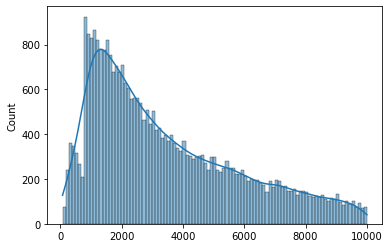

In [81]:
path_folder = '/home/temporal2/mvazquez/bdd/BOBSL/bobsl/subtitles/manually-aligned'
npy_duration = get_duration_vtt_folder(path_folder)

print ('min: {}'.format(npy_duration.min()))
print ('max: {}'.format(npy_duration.max()))
print ('average: {}'.format(npy_duration.mean()))

9999
min: 3
max: 9999
average: 3068.5040924690406


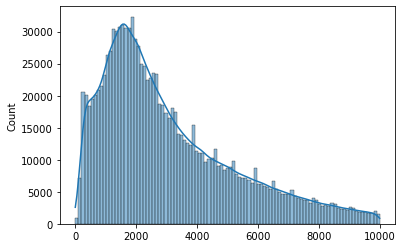

In [82]:
path_folder = '/home/temporal2/mvazquez/bdd/BOBSL/bobsl/subtitles/audio-aligned'
npy_duration = get_duration_vtt_folder(path_folder)

print ('min: {}'.format(npy_duration.min()))
print ('max: {}'.format(npy_duration.max()))
print ('average: {}'.format(npy_duration.mean()))